# 데이터 취득 및 전처리

In [ ]:
pip install selenium

     ------------------------------------- 986.0/986.0 kB 20.8 MB/s eta 0:00:00
  Using cached trio-0.21.0-py3-none-any.whl (358 kB)
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
     ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
     ------------------------------------- 179.1/179.1 kB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 118.7/118.7 kB ? eta 0:00:00
  Using cached h11-0.13.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
import json
import pandas as pd

import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
url = "http://data.ex.co.kr/openapi/odtraffic/upDownTrafficAmount"


params = {'key' : '2683876556',
          'type' : 'json',
          'startUnitCode' : '101',
          'endUnitCode' : '140'
}

response = requests.get(url,params=params)
response

<Response [200]>

In [ ]:
response.text

'{"list":[{"pageNo":null,"numOfRows":null,"tmType":"2","trafficAmout":"3","tmName":"15분","carType":"1","sumTm":"1645","startUnitCode":"101 ","startUnitName":"서울","endUnitCode":"140 ","endUnitName":"부산"}],"count":1,"pageNo":1,"numOfRows":10,"pageSize":1,"message":"인증키가 유효합니다.","code":"SUCCESS"}'

In [ ]:
js = json.loads(response.text)

In [ ]:
js['list']

[{'tmType': '2',
  'tmName': '15분',
  'carType': '1',
  'sumTm': '1745',
  'startUnitCode': '101 ',
  'startUnitName': '서울',
  'endUnitCode': '140 ',
  'endUnitName': '부산',
  'timeAvg': '16333',
  'timeMid': None,
  'timeMax': '15356',
  'timeMin': '15356'},
 {'tmType': '2',
  'tmName': '15분',
  'carType': '1',
  'sumTm': '1745',
  'startUnitCode': '115 ',
  'startUnitName': '대전',
  'endUnitCode': '140 ',
  'endUnitName': '부산',
  'timeAvg': '-1',
  'timeMid': None,
  'timeMax': '0',
  'timeMin': '0'},
 {'tmType': '2',
  'tmName': '15분',
  'carType': '1',
  'sumTm': '1745',
  'startUnitCode': '130 ',
  'startUnitName': '동김천',
  'endUnitCode': '140 ',
  'endUnitName': '부산',
  'timeAvg': '-1',
  'timeMid': None,
  'timeMax': '0',
  'timeMin': '0'},
 {'tmType': '2',
  'tmName': '15분',
  'carType': '1',
  'sumTm': '1745',
  'startUnitCode': '132 ',
  'startUnitName': '영천',
  'endUnitCode': '140 ',
  'endUnitName': '부산',
  'timeAvg': '3691',
  'timeMid': None,
  'timeMax': '4316',
  'timeMin

In [ ]:
df = pd.DataFrame(js['list'])

In [ ]:
df

,tmType,tmName,carType,sumTm,startUnitCode,startUnitName,endUnitCode,endUnitName,timeAvg,timeMid,timeMax,timeMin
0,2,15분,1,1745,101,서울,140,부산,16333,None,15356,15356
1,2,15분,1,1745,115,대전,140,부산,-1,None,0,0
2,2,15분,1,1745,130,동김천,140,부산,-1,None,0,0
3,2,15분,1,1745,132,영천,140,부산,3691,None,4316,2904
4,2,15분,1,1745,135,경주,140,부산,2511,None,3551,2087
5,2,15분,2,1745,135,경주,140,부산,-1,None,0,0
6,2,15분,6,1745,139,서울산,140,부산,1267,None,1318,1233
7,2,15분,1,1745,139,서울산,140,부산,1255,None,1476,1148
8,2,15분,2,1745,139,서울산,140,부산,-1,None,0,0
9,2,15분,1,1745,137,통도사,140,부산,1027,None,1160,914


In [ ]:
df[df['sphlDfttCode'] == '2']['sphlDfttScopTypeCode'].unique()

array(['5', '6', '7'], dtype=object)

In [ ]:
day = dt.datetime(2021, 8, 22)
term = dt.timedelta(days=30)
term_1 = dt.timedelta(days=1)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:


# 크롬을 실행하는 driver 객체를 만들면 크롬이 실행된다.
driver = webdriver.Chrome()

# driver 객체의 get메소드를 사용해서 원하는 URL로 이동할 수 있다.
driver.get("http://data.ex.co.kr/portal/time/timeCity#")



In [ ]:
for i in range(0,42):

    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').clear()
    driver.find_element(By.CSS_SELECTOR,'#searchDay').clear()
    time.sleep(1)
    day_from = day - term
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').send_keys(day_from.strftime("%Y.%m.%d"))
    driver.find_element(By.CSS_SELECTOR,'#searchDay').send_keys(day.strftime("%Y.%m.%d"))
    day = day_from - term_1
    driver.find_element(By.CSS_SELECTOR,'#frmSearch > div:nth-child(2) > div.item > div > span:nth-child(1) > img').click()
    driver.find_element(By.CSS_SELECTOR,'#btnSearch > span').click()
    time.sleep(6)
    driver.find_element(By.CSS_SELECTOR,'#btnCsv > span').click()
    time.sleep(3)

In [ ]:
driver.close()

----

In [ ]:
# 크롬을 실행하는 driver 객체를 만들면 크롬이 실행된다.
driver = webdriver.Chrome()

# driver 객체의 get메소드를 사용해서 원하는 URL로 이동할 수 있다.
driver.get("http://data.ex.co.kr/portal/traffic/trafficUpDownIc#")

In [ ]:
day = dt.datetime(2022, 9, 1)
term = dt.timedelta(days=30)
term_1 = dt.timedelta(days=1)

In [ ]:
for i in range(0,60):
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').clear()
    driver.find_element(By.CSS_SELECTOR,'#searchDay').clear()
    time.sleep(1)
    day_from = day - term
    driver.find_element(By.CSS_SELECTOR,'#searchDayFrom').send_keys(day_from.strftime("%Y.%m.%d"))
    driver.find_element(By.CSS_SELECTOR,'#searchDay').send_keys(day.strftime("%Y.%m.%d"))
    day = day_from - term_1
    driver.find_element(By.CSS_SELECTOR,'#frmSearch > div:nth-child(2) > div:nth-child(4) > span:nth-child(1) > img').click()
    driver.find_element(By.CSS_SELECTOR,'#btnSearch > span').click()
    time.sleep(3)
    driver.find_element(By.CSS_SELECTOR,'#btnCsv > span').click()
    time.sleep(2)

In [ ]:
df_sample = pd.read_csv('./통행시간/OpenOASIS (1).csv',encoding='cp949')

In [ ]:
df_sample

,출발,도착,자료종류,시간,2022.08.29,2022.08.28,2022.08.27,2022.08.26,2022.08.25,2022.08.24,...,2022.08.08,2022.08.07,2022.08.06,2022.08.05,2022.08.04,2022.08.03,2022.08.02,2022.08.01,2022.07.31,2022.07.30
0,서울,부산,평균값,00시,249,0,239,251,0,211,...,254,215,270,325,0,225,0,261,195,272
1,서울,부산,평균값,01시,246,296,0,260,246,243,...,0,213,262,0,0,0,368,256,212,273
2,서울,부산,평균값,02시,248,279,0,0,268,243,...,244,0,255,296,0,0,312,0,0,246
3,서울,부산,평균값,03시,0,0,0,0,0,282,...,241,0,248,0,221,0,306,257,258,266
4,서울,부산,평균값,04시,237,264,335,0,0,310,...,0,206,0,0,226,234,0,294,0,251
5,서울,부산,평균값,05시,0,0,0,260,0,258,...,225,0,0,0,0,404,0,0,0,241
6,서울,부산,평균값,06시,236,252,0,0,0,250,...,225,0,245,272,0,0,0,0,229,0
7,서울,부산,평균값,07시,0,0,0,291,251,236,...,231,277,0,269,0,0,0,0,270,274
8,서울,부산,평균값,08시,239,0,248,284,0,236,...,248,310,235,261,235,0,0,290,0,311
9,서울,부산,평균값,09시,241,0,0,280,0,0,...,0,0,226,252,233,0,0,279,272,267


In [ ]:
def func(a):
    if len(str(a)) > 3:
        h,m = map(int,a.split(':'))
        t = h*60 + m
        return int(t)
    return a

In [ ]:
for col in df_sample.columns:
    df_sample[col] = df_sample[col].apply(func)

In [ ]:
df_sample['2022.08.29'].sum() / (24 -(df_sample['2022.08.29'] == 0).sum())


262.0625

In [ ]:
df_sample

,time,통행시간


In [ ]:
df_sample.iloc[1,3]

'01시'

In [ ]:
ridx = 0
new_lst = []
pass_lst = []

for i in range(1,73):
    df = pd.read_csv(f'./통행시간/OpenOASIS ({i}).csv',encoding='cp949')

    for col in df.columns:
        df[col] = df[col].apply(func)
    
    for row in range(df.shape[0]):
        cidx = 0
        for col in df.columns:
            if cidx > 3:           
                ymd = col.split('.')
                new =  dt.datetime(int(ymd[0]), int(ymd[1]), int(ymd[2]))
                new_lst.append(new)
                df[col] = df[col].astype(int)

                did = (24 -(df[col] == 0).sum())
                if did :
                    pass_lst.append(df[col].sum() // did)
                else:
                    pass_lst.append(0)
                    
            cidx += 1

In [ ]:
df_tmp = pd.DataFrame({'datetime':new_lst,'time':pass_lst})

In [ ]:
df_tmp['datetime'].value_counts()

2022-08-29    1
2018-07-31    1
2018-08-06    1
2018-08-05    1
2018-08-04    1
             ..
2020-08-21    1
2020-08-22    1
2020-08-23    1
2020-08-24    1
2016-07-20    1
Name: datetime, Length: 2232, dtype: int64

In [ ]:
ridx = 0
new_lst = []
pass_lst = []

for i in range(1,73):
    df = pd.read_csv(f'./통행시간/OpenOASIS ({i}).csv',encoding='cp949')

    for row in range(df.shape[0]):
        cidx = 0
        for col in df.columns:
            if cidx > 3:           
                ymd = col.split('.')
                new =  dt.datetime(int(ymd[0]), int(ymd[1]), int(ymd[2]),int(df.iloc[row,3][:-1]))
                new_lst.append(new)
                pass_lst.append(df.iloc[ridx,cidx])
            cidx += 1

In [ ]:
print(len(ymd_lst))
print(len(h_lst))
print(len(pass_lst))

53568
53568
53568


In [ ]:
df_tmp['datetime'] = new_lst
df_tmp['통행시간'] = pass_lst

In [ ]:
df_tmp.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_tmp.sort_values(by='datetime',inplace=True)

In [ ]:
df_tmp = df_tmp.reset_index()


In [ ]:
df_tmp.drop('index',axis=1,inplace=True)

In [ ]:
df_tmp.drop_duplicates('datetime',inplace=True)

In [ ]:
df_tmp

,datetime,time
0,2016-07-20,318
1,2016-07-21,290
2,2016-07-22,282
3,2016-07-23,296
4,2016-07-24,284
...,...,...
2227,2022-08-25,278
2228,2022-08-26,279
2229,2022-08-27,302
2230,2022-08-28,279


In [ ]:
df_tmp = df_tmp[df_tmp['datetime'] >= '2019-11-01']

In [ ]:
df_tmp = pd.read_csv('highway_data2.csv',index_col=False)

In [ ]:
df_tmp.drop('Unnamed: 0',axis = 1,inplace=True)

In [ ]:
df_tmp['통행시간(분)'] = df_tmp['통행시간'].apply(func)

In [ ]:
df_tmp.drop('통행시간',axis= 1,inplace=True)

In [ ]:
df_tmp.to_csv('highway_data2.csv')

In [ ]:
df_tmp.sort_values(by='datetime',inplace=True)

In [ ]:
df_tmp.reset_index(inplace=True)

In [ ]:
df_tmp.drop('index',inplace=True,axis=1)

In [ ]:
df_tmp = df_tmp.iloc[1200:]

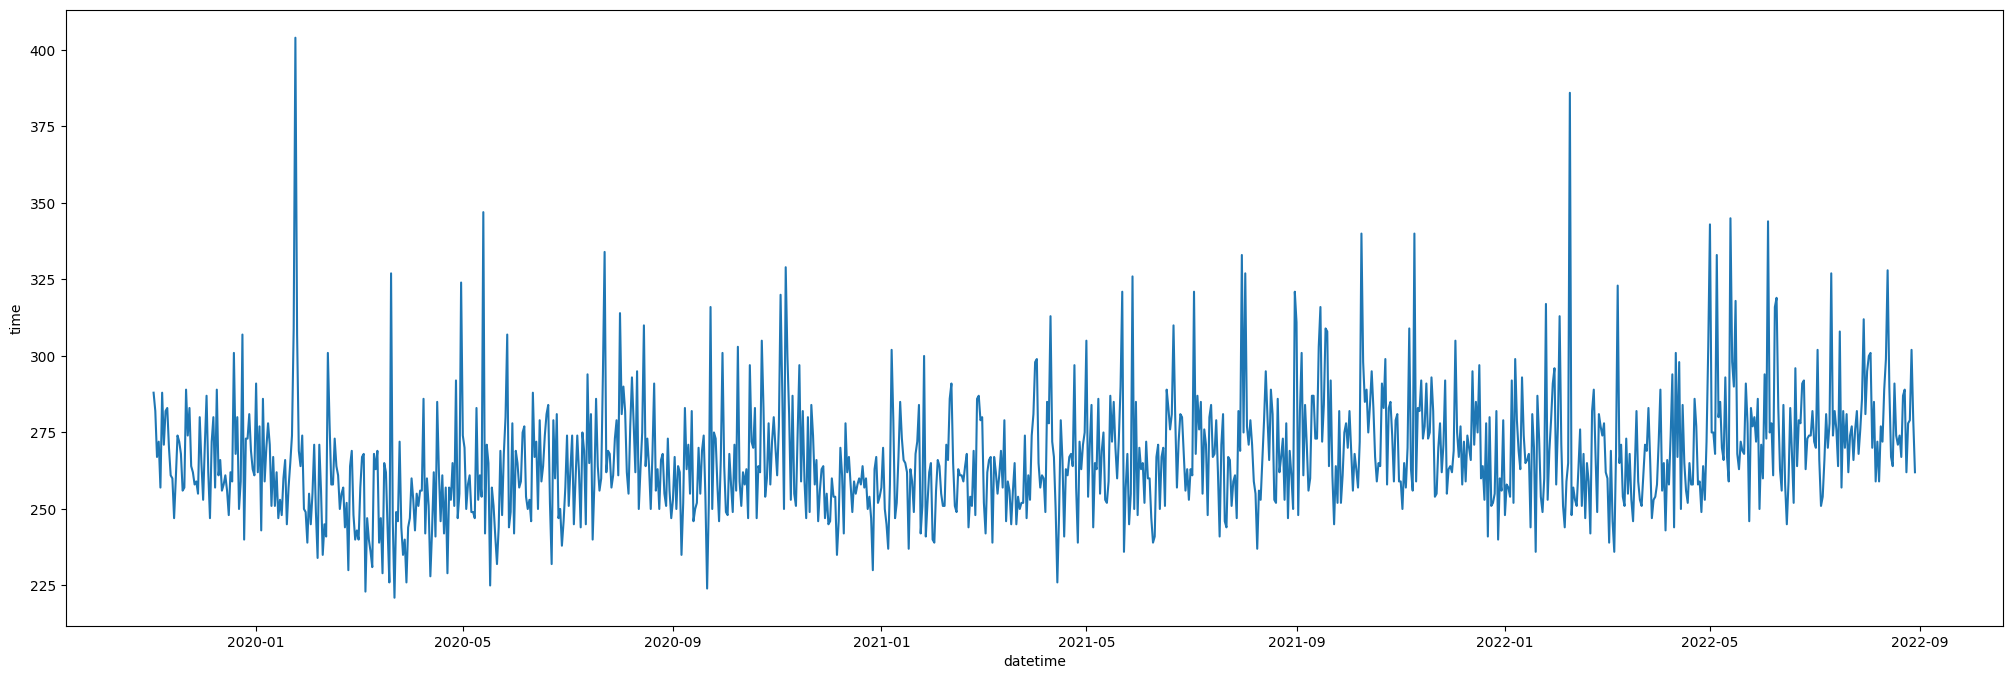

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x='datetime',y='time',data=df_tmp)
plt.show()

In [ ]:

# product 함수를 이용하여 값의 조합을 구성
p = [0,1,2,3,4]
q = [0,1,2,3,4]
d = [1]
iter = list(product(p,d,q))
iter


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [ ]:
df_tmp.set_index('datetime', inplace=True)

In [ ]:
df_tmp = df_tmp.asfreq('D')

In [ ]:
df_tmp

NameError: name 'df_tmp' is not defined

In [ ]:
y = df_tmp.loc[:, 'time']

In [ ]:
train = y[:-30]
val = y[-30:]

In [ ]:
train


datetime
2019-11-02    288
2019-11-03    282
2019-11-04    267
2019-11-05    272
2019-11-06    257
             ... 
2022-07-26    282
2022-07-27    268
2022-07-28    276
2022-07-29    286
2022-07-30    312
Freq: D, Name: time, Length: 1002, dtype: int64

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


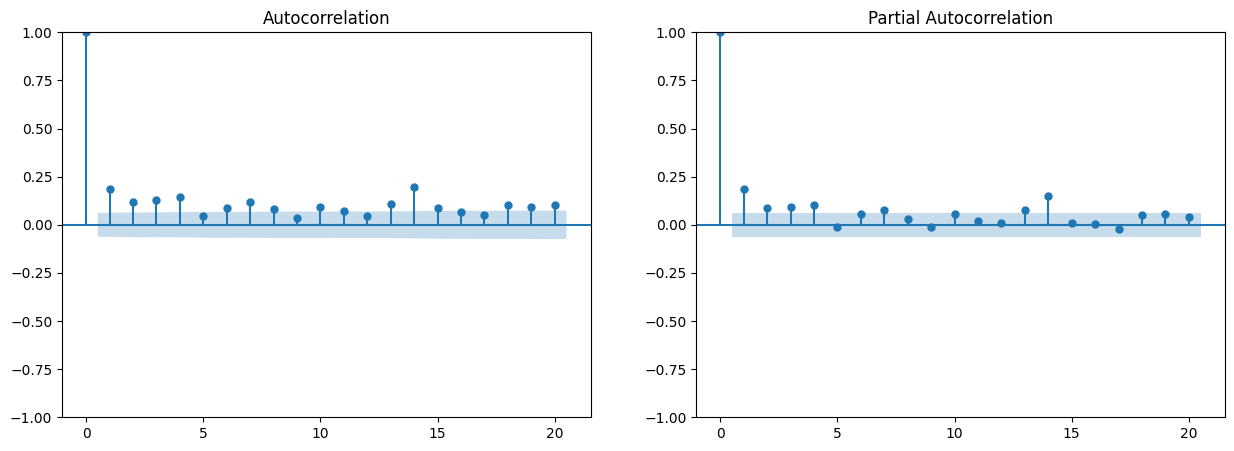

In [ ]:
lags = 20

fig,ax = plt.subplots(1,2, figsize = (15,5))
plot_acf(train, lags = lags, ax = ax[0])
plot_pacf(train, lags = lags, ax = ax[1])
plt.show()

In [ ]:
p = [0,1,2,3,4]
q = [0,1,2,3,4]
d = [0,1]
iter = list(product(p,d,q))

In [ ]:
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(val, pred))
    aic.append(model_fit.aic)
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 4)
(1, 1, 0)
(1, 1, 1)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 0, 0)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(2, 0, 1)
(2, 0, 2)
(2, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(2, 0, 4)
(2, 1, 0)
(2, 1, 1)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2)
(2, 1, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(3, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 4)
(3, 1, 0)
(3, 1, 1)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(3, 1, 2)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 3)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 4)
(4, 1, 0)
(4, 1, 1)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(4, 1, 2)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 3)
(4, 1, 4)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(p,d,q)",mae,aic
42,"(4, 0, 2)",12.074028,18576.236835


,"params(p,d,q)",mae,aic
48,"(4, 1, 3)",12.161139,18546.356961


In [ ]:
#model2_1 = sm.tsa.SARIMAX(train, order=(4,0,2)).fit()
model2_2 = sm.tsa.SARIMAX(train, order=(4,1,3)).fit()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
def residual_diag(residuals, lags = 20) :

    print('* 정규성 검정(> 0.05) : ', round(stats.shapiro(residuals)[1],5))
    print('* 정상성 검정(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* 자기상관성 확인(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


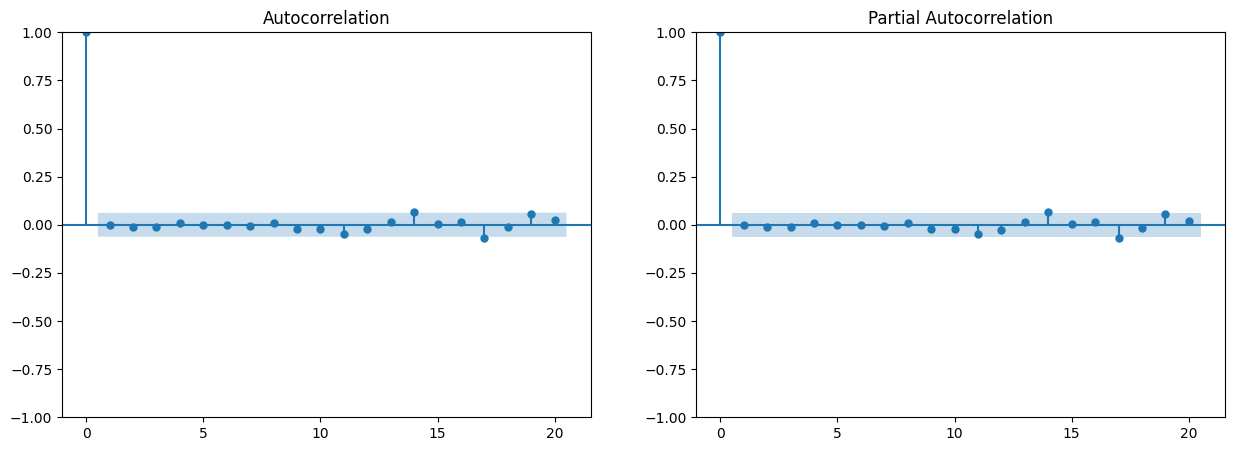

In [ ]:
residuals = model2_2.resid
residual_diag(residuals)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)

In [ ]:
rmse, mae, mape, aic = [],[],[],[]
residuals = []
preds = []
p,d,q = 4,1,4

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    train = y[train_index]
    val = y[val_index]

    # 학습
    model = sm.tsa.SARIMAX(train, order=(p,d,q)).fit()

    # 예측
    pred = model.forecast(val_size)
    preds += list(pred)

    # 잔차 저장
    residuals += list(model.resid)

    # 평가
    rmse.append(mean_squared_error(val, pred, squared = False))
    mae.append(mean_absolute_error(val, pred))
    mape.append(mean_absolute_percentage_error(val, pred))
    aic.append(model.aic)

NameError: name 'x' is not defined

In [ ]:
pred = model2_2.forecast(30)
mean_absolute_percentage_error(val, pred)

0.04247475160629504

In [ ]:
val

datetime
2022-07-31    281
2022-08-01    295
2022-08-02    300
2022-08-03    301
2022-08-04    270
2022-08-05    285
2022-08-06    259
2022-08-07    272
2022-08-08    259
2022-08-09    277
2022-08-10    272
2022-08-11    289
2022-08-12    299
2022-08-13    328
2022-08-14    290
2022-08-15    267
2022-08-16    264
2022-08-17    291
2022-08-18    274
2022-08-19    271
2022-08-20    274
2022-08-21    267
2022-08-22    287
2022-08-23    289
2022-08-24    262
2022-08-25    278
2022-08-26    279
2022-08-27    302
2022-08-28    279
2022-08-29    262
Freq: D, Name: time, dtype: int64

In [ ]:
pred

2022-07-31    276.213144
2022-08-01    279.365386
2022-08-02    282.796040
2022-08-03    275.517987
2022-08-04    273.421849
2022-08-05    281.292011
2022-08-06    279.742591
2022-08-07    272.532297
2022-08-08    277.284485
2022-08-09    282.372061
2022-08-10    275.352427
2022-08-11    273.394639
2022-08-12    281.285216
2022-08-13    279.725473
2022-08-14    272.531941
2022-08-15    277.297684
2022-08-16    282.365319
2022-08-17    275.341891
2022-08-18    273.405974
2022-08-19    281.290668
2022-08-20    279.711702
2022-08-21    272.532626
2022-08-22    277.311146
2022-08-23    282.358634
2022-08-24    275.331413
2022-08-25    273.417328
2022-08-26    281.296083
2022-08-27    279.697937
2022-08-28    272.533348
2022-08-29    277.324586
Freq: D, Name: predicted_mean, dtype: float64

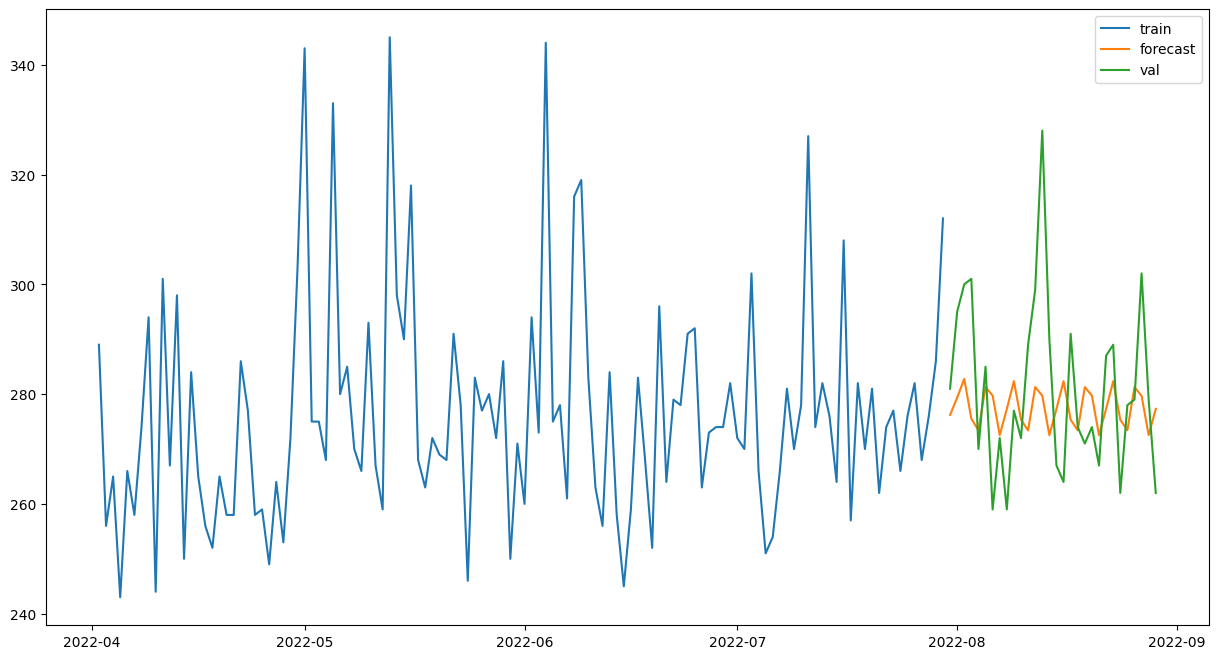

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend()
plt.show()

---

In [ ]:
df_traffic = pd.read_csv('./이용차량/OpenOASIS (1).csv',encoding='cp949')

In [ ]:
df_traffic

,출발,도착,일자,교통량
0,서울,부산,2022.08.02,16
1,서울,부산,2022.08.03,16
2,서울,부산,2022.08.04,16
3,서울,부산,2022.08.05,14
4,서울,부산,2022.08.06,18
5,서울,부산,2022.08.07,13
6,서울,부산,2022.08.08,18
7,서울,부산,2022.08.09,5
8,서울,부산,2022.08.10,6
9,서울,부산,2022.08.11,17


In [ ]:
for i in range(2,68):
    df_tmp1 = pd.read_csv(f'./이용차량/OpenOASIS ({i}).csv',encoding='cp949')
    df_traffic = pd.concat([df_tmp1,df_traffic])

In [ ]:
df_traffic.drop(['출발','도착'],axis=1,inplace=True)

In [ ]:
def transform(a):
    return a.replace('.','-')

In [ ]:
df_traffic['일자'] = df_traffic['일자'].apply(transform)

In [ ]:
df_traffic

,출발,도착,일자,교통량
0,서울,부산,2022-01-27,19
1,서울,부산,2022-01-28,26
2,서울,부산,2022-01-29,48
3,서울,부산,2022-01-30,46
4,서울,부산,2022-01-31,20
...,...,...,...,...
26,서울,부산,2022-08-28,11
27,서울,부산,2022-08-29,12
28,서울,부산,2022-08-30,11
29,서울,부산,2022-08-31,10


In [ ]:
df_traffic.set_index('일자', inplace=True)

In [ ]:
df_tmp = df_tmp[df_tmp['datetime'] >= '2019-11-20']

In [ ]:
df_tmp.set_index('datetime', inplace=True)

In [ ]:
df= pd.merge(df_tmp,df_traffic,left_index=True,right_on='일자')
# https://haloaround.tistory.com/267

In [ ]:
df_tmp = pd.read_csv('highway_data2.csv')

In [ ]:
df_tmp.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_tmp

NameError: name 'df_tmp' is not defined

In [ ]:
df.to_csv('data.csv')

In [ ]:
df['time_lag_day1'] = df['time'].shift()

In [ ]:
df['time_lag_day7'] = df['time'].shift(7)
df['time_lag_day30'] = df['time'].shift(30)

In [ ]:
df['교통량_lag_day1'] = df['교통량'].shift()
df['교통량_lag_day7'] = df['교통량'].shift(7)
df['교통량_lag_day30'] = df['교통량'].shift(30)

In [ ]:
df.dropna(inplace=True)

NameError: name 'df' is not defined

In [ ]:
df.to_csv('data_final.csv')

----

# 모델링

## 라이브러리

In [ ]:
import requests
import json
import pandas as pd

import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
def residual_diag(residuals, lags = 20) :

    print('* 정규성 검정(> 0.05) : ', round(stats.shapiro(residuals)[1],5))
    print('* 정상성 검정(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* 자기상관성 확인(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

## 데이터 전처리

In [ ]:
data = pd.read_csv('data_final.csv')
data = data.loc[data['일자']>= '2017-10-31']
data = data.drop_duplicates('일자')

In [ ]:

data.head()

,일자,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30
61,2017-10-31,268,12,273.0,280.0,288.0,22.0,15.0,0.0
62,2017-11-01,286,18,268.0,335.0,320.0,12.0,0.0,63.0
63,2017-11-02,259,19,286.0,268.0,374.0,18.0,0.0,73.0
64,2017-11-03,267,0,259.0,282.0,367.0,19.0,0.0,53.0
65,2017-11-04,282,0,267.0,277.0,377.0,0.0,0.0,75.0


In [ ]:
data['일자']= pd.to_datetime(data['일자'])
data['DT'] = data['일자']

data.set_index('DT', inplace=True)
data.drop('일자',axis=1,inplace=True)
data.head()


,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30
DT,,,,,,,,
2017-10-31,268,12,273.0,280.0,288.0,22.0,15.0,0.0
2017-11-01,286,18,268.0,335.0,320.0,12.0,0.0,63.0
2017-11-02,259,19,286.0,268.0,374.0,18.0,0.0,73.0
2017-11-03,267,0,259.0,282.0,367.0,19.0,0.0,53.0
2017-11-04,282,0,267.0,277.0,377.0,0.0,0.0,75.0


In [ ]:
data.shape

(1762, 8)

In [ ]:
data = data.asfreq('D')



In [ ]:
data['y'] = data['time'].shift(-7)
display(data.head())
display(data.tail())


,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30,y
DT,,,,,,,,,
2017-10-31,268.0,12.0,273.0,280.0,288.0,22.0,15.0,0.0,242.0
2017-11-01,286.0,18.0,268.0,335.0,320.0,12.0,0.0,63.0,259.0
2017-11-02,259.0,19.0,286.0,268.0,374.0,18.0,0.0,73.0,273.0
2017-11-03,267.0,0.0,259.0,282.0,367.0,19.0,0.0,53.0,267.0
2017-11-04,282.0,0.0,267.0,277.0,377.0,0.0,0.0,75.0,285.0


,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30,y
DT,,,,,,,,,
2022-08-24,262.0,13.0,289.0,274.0,277.0,11.0,13.0,5.0,NaN
2022-08-25,278.0,10.0,262.0,267.0,272.0,13.0,11.0,6.0,NaN
2022-08-26,279.0,11.0,278.0,287.0,289.0,10.0,4.0,17.0,NaN
2022-08-27,302.0,11.0,279.0,289.0,299.0,11.0,11.0,23.0,NaN
2022-08-28,279.0,11.0,302.0,262.0,328.0,11.0,13.0,30.0,NaN


In [ ]:
data.dropna(axis = 0, inplace = True)
data.tail()

,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30,y
DT,,,,,,,,,
2022-08-17,291.0,13.0,264.0,328.0,300.0,13.0,30.0,16.0,262.0
2022-08-18,274.0,13.0,291.0,290.0,301.0,13.0,24.0,16.0,278.0
2022-08-19,271.0,18.0,274.0,267.0,270.0,13.0,24.0,16.0,279.0
2022-08-20,274.0,13.0,271.0,264.0,285.0,18.0,13.0,14.0,302.0
2022-08-21,267.0,11.0,274.0,291.0,259.0,13.0,13.0,18.0,279.0


In [ ]:
target = 'y'

x = data.drop([target], axis = 1)
y = data.loc[:, target]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# validation set size
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=30)

In [ ]:
rmse, mae, mape, aic = [],[],[],[]
residuals = []
preds = []
p,d,q = 4,1,4

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    train = y[train_index]
    val = y[val_index]

    # 학습
    model = sm.tsa.SARIMAX(train, order=(p,d,q)).fit()

    # 예측
    pred = model.forecast(val_size)
    preds += list(pred)

    # 잔차 저장
    residuals += list(model.resid)

    # 평가
    rmse.append(mean_squared_error(val, pred, squared = False))
    mae.append(mean_absolute_error(val, pred))
    mape.append(mean_absolute_percentage_error(val, pred))
    aic.append(model.aic)

In [ ]:
train = y[:-30]
val = y[-30:]

## 모델링

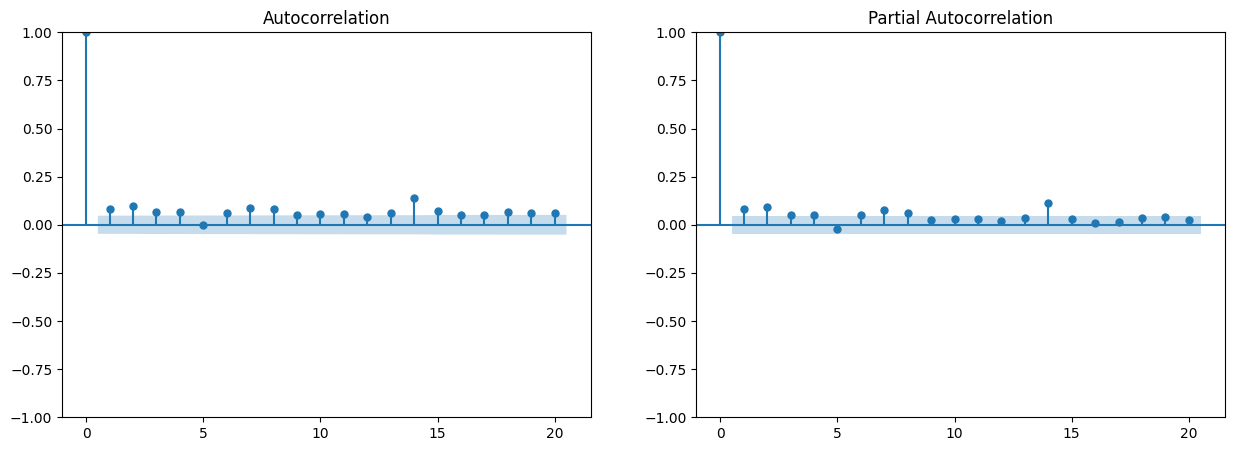

In [ ]:
lags = 20

fig,ax = plt.subplots(1,2, figsize = (15,5))
plot_acf(train, lags = lags, ax = ax[0])
plot_pacf(train, lags = lags, ax = ax[1])
plt.show()

In [ ]:
from itertools import product

p = [0,1,2,3,4]
q = [0,1,2,3,4]
d = [0,1]
iter = list(product(p,d,q))
iter

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [ ]:
# 
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(val, pred))
    aic.append(model_fit.aic)
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [ ]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(p,d,q)",mae,aic
48,"(4, 1, 3)",12.09858,15674.745425


,"params(p,d,q)",mae,aic
48,"(4, 1, 3)",12.09858,15674.745425


In [ ]:
#model2_1 = sm.tsa.SARIMAX(train, order=(2,0,3)).fit()
model2_2 = sm.tsa.SARIMAX(train, order=(4,1,3)).fit()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


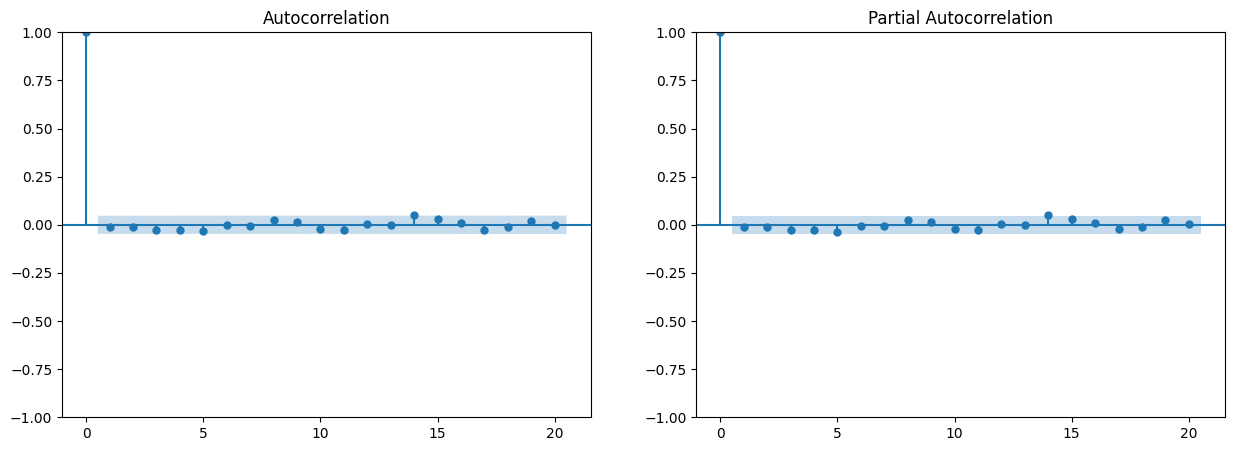

In [ ]:
residuals = model2_2.resid
residual_diag(residuals)

In [ ]:
pred2_2 = model2_2.forecast(30)
mean_absolute_percentage_error(val, pred)

0.04234983856844959

In [ ]:
pred2_2.index = val.index

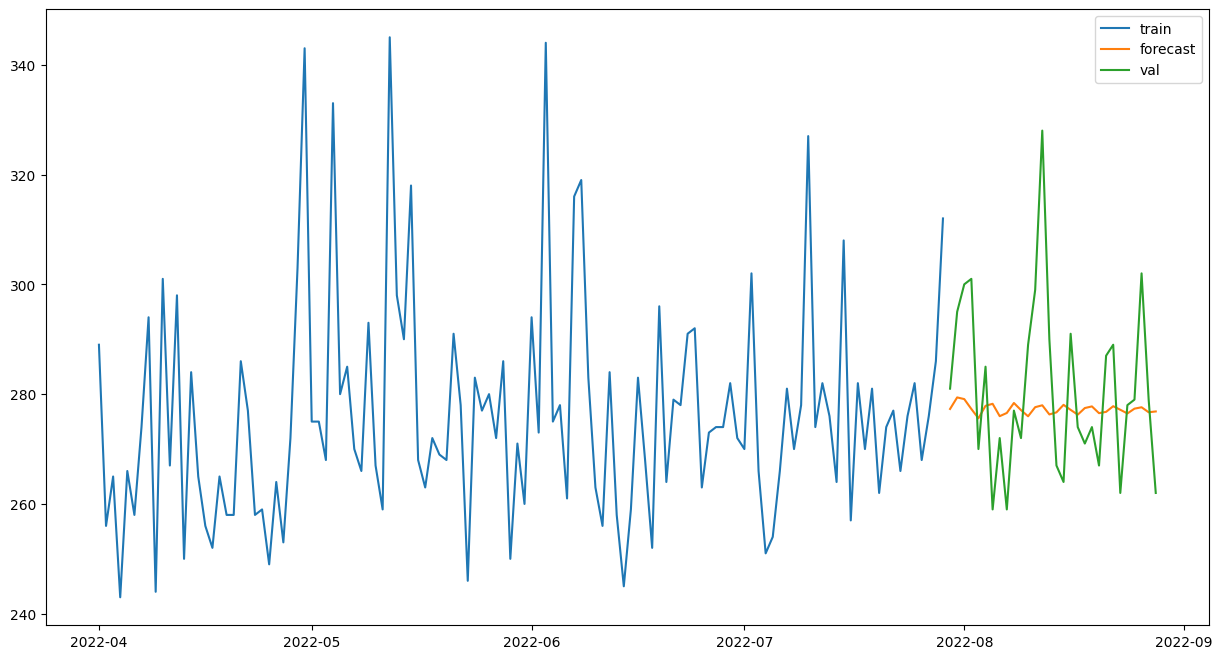

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred2_2, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend()
plt.show()

In [ ]:
val_size = 30
x_train, y_train = x[:-val_size], y[:-val_size]
x_val, y_val = x[-val_size:], y[-val_size:]

In [ ]:
model3_1 = sm.tsa.SARIMAX(y_train, order=(4,1,4), exog=x_train).fit()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


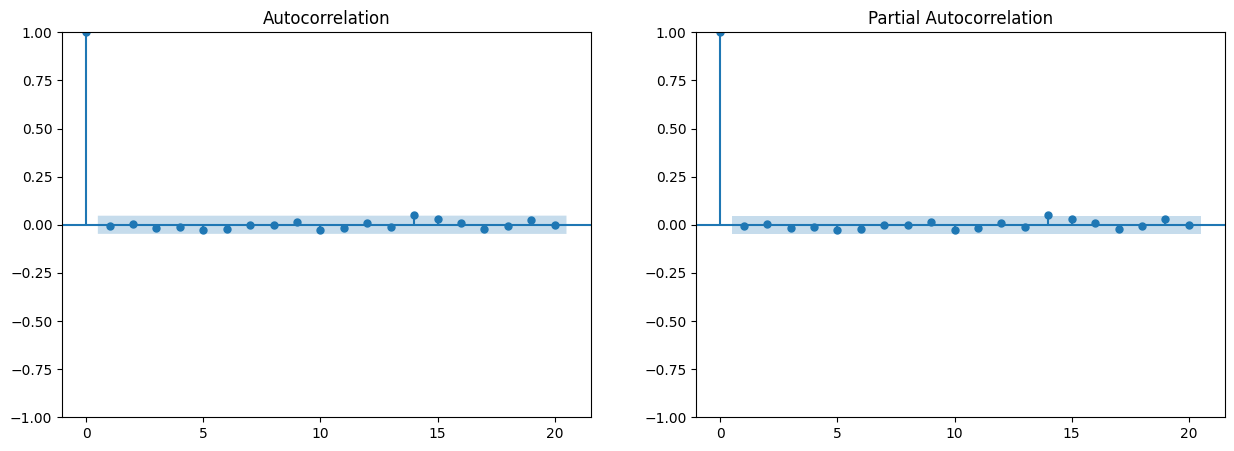

In [ ]:
residuals = model3_1.resid
residual_diag(residuals)

In [ ]:
pred3_1 = model3_1.forecast(30,  exog=x_val)
mean_absolute_percentage_error(y_val, pred3_1)

0.052583306663618504

In [ ]:
pred3_1.index = y_val.index

In [ ]:
y_val

DT
2022-07-30    281.0
2022-07-31    295.0
2022-08-01    300.0
2022-08-02    301.0
2022-08-03    270.0
2022-08-04    285.0
2022-08-05    259.0
2022-08-06    272.0
2022-08-07    259.0
2022-08-08    277.0
2022-08-09    272.0
2022-08-10    289.0
2022-08-11    299.0
2022-08-12    328.0
2022-08-13    290.0
2022-08-14    267.0
2022-08-15    264.0
2022-08-16    291.0
2022-08-17    274.0
2022-08-18    271.0
2022-08-19    274.0
2022-08-20    267.0
2022-08-21    287.0
2022-08-22    289.0
2022-08-23    262.0
2022-08-24    278.0
2022-08-25    279.0
2022-08-26    302.0
2022-08-27    279.0
2022-08-28    262.0
Name: y, dtype: float64

In [ ]:
pred3_1

DT
2022-07-30    275.888321
2022-07-31    277.618775
2022-08-01    276.925552
2022-08-02    275.568225
2022-08-03    277.168215
2022-08-04    278.929508
2022-08-05    276.983590
2022-08-06    276.123832
2022-08-07    275.246407
2022-08-08    278.046613
2022-08-09    274.817185
2022-08-10    275.744523
2022-08-11    277.988346
2022-08-12    276.555774
2022-08-13    275.472771
2022-08-14    276.885408
2022-08-15    276.093483
2022-08-16    273.580387
2022-08-17    275.083555
2022-08-18    277.477189
2022-08-19    276.203611
2022-08-20    274.297712
2022-08-21    276.846166
2022-08-22    277.550417
2022-08-23    277.861984
2022-08-24    277.440714
2022-08-25    276.901915
2022-08-26    278.396380
2022-08-27    276.035712
2022-08-28    275.647918
Name: predicted_mean, dtype: float64

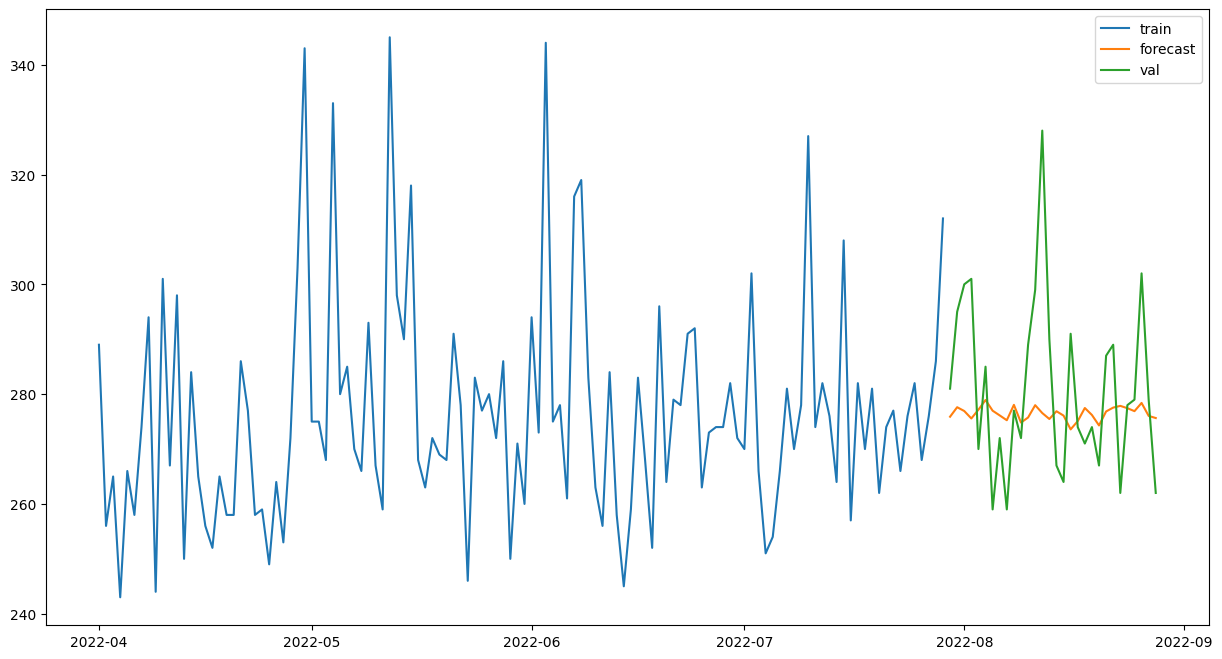

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred3_1, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend() 
plt.show()

In [ ]:
model3_2 = sm.tsa.SARIMAX(train, order=(4,1,4), seasonal_order=(4,1,4,7),exog=x_train).fit()


In [ ]:
pred3_2 = model3_2.forecast(30,exog=x_val)
mean_absolute_percentage_error(y_val, pred3_2)

0.04296048557887112

In [ ]:
pred3_2.index = y_val.index

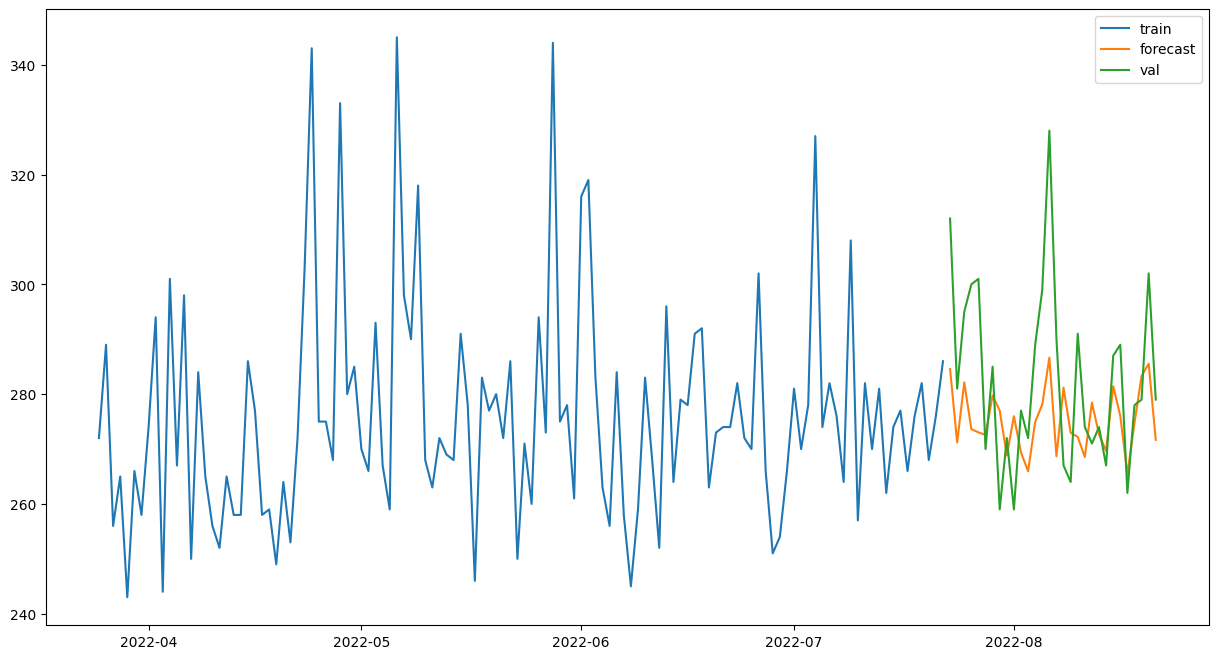

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred3_2, label = 'forecast')
plt.plot(y_val, label = 'val')
plt.legend() 
plt.show()

In [ ]:
import joblib



joblib.dump(model3_2, 'SARIMAX.joblib')


['SARIMAX.joblib']

------

# 예측

## 데이터 만들기

- 9월 2일 데이터로 time	교통량	time_lag_day1	time_lag_day7	time_lag_day30	교통량_lag_day1	교통량_lag_day7	교통량_lag_day30 데이터셋 만들기

In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
def func(a):
    if len(str(a)) > 3:
        h,m = map(int,a.split(':'))
        t = h*60 + m
        return int(t)
    return a

ridx = 0
new_lst = []
pass_lst = []

for i in range(1,3):
    df = pd.read_csv(f'./test_data/이동시간_{i}.csv',encoding='cp949')

    for col in df.columns:
        df[col] = df[col].apply(func)

    for row in range(df.shape[0]):
        cidx = 0
        for col in df.columns:
            if cidx > 3:           
                ymd = col.split('.')
                new =  dt.datetime(int(ymd[0]), int(ymd[1]), int(ymd[2]))
                new_lst.append(new)
                df[col] = df[col].astype(int)

                did = (24 -(df[col] == 0).sum())
                if did :
                    pass_lst.append(df[col].sum() // did)
                else:
                    pass_lst.append(0)
                    
            cidx += 1

In [ ]:
df_time = pd.DataFrame({'datetime':new_lst,'time':pass_lst})
df_time.tail()

,datetime,time
1483,2022-07-09,270
1484,2022-07-08,281
1485,2022-07-07,266
1486,2022-07-06,254
1487,2022-07-05,251


In [ ]:
df_time.drop_duplicates('datetime',inplace=True)
df_time['datetime'].value_counts()

2022-09-02    1
2022-09-01    1
2022-08-01    1
2022-07-31    1
2022-07-30    1
2022-07-29    1
2022-07-28    1
2022-07-27    1
2022-07-26    1
2022-07-25    1
2022-07-24    1
2022-07-23    1
2022-07-22    1
2022-07-21    1
2022-07-20    1
2022-07-19    1
2022-07-18    1
2022-07-17    1
2022-07-16    1
2022-07-15    1
2022-07-14    1
2022-07-13    1
2022-07-12    1
2022-07-11    1
2022-07-10    1
2022-07-09    1
2022-07-08    1
2022-07-07    1
2022-07-06    1
2022-08-02    1
2022-08-03    1
2022-08-04    1
2022-08-19    1
2022-08-31    1
2022-08-30    1
2022-08-29    1
2022-08-28    1
2022-08-27    1
2022-08-26    1
2022-08-25    1
2022-08-24    1
2022-08-23    1
2022-08-22    1
2022-08-21    1
2022-08-20    1
2022-08-18    1
2022-08-05    1
2022-08-17    1
2022-08-16    1
2022-08-15    1
2022-08-14    1
2022-08-13    1
2022-08-12    1
2022-08-11    1
2022-08-10    1
2022-08-09    1
2022-08-08    1
2022-08-07    1
2022-08-06    1
2022-07-05    1
Name: datetime, dtype: int64

In [ ]:
df_traffic1 = pd.read_csv('./test_data/통행량_1.csv',encoding='cp949')
df_traffic2 = pd.read_csv('./test_data/통행량_2.csv',encoding='cp949')
df_traffic = pd.concat([df_traffic2,df_traffic1])
df_traffic.drop(['출발','도착'],axis=1,inplace=True)
#df_traffic.sort_index('일자',inplace=True)
df_traffic

,일자,교통량
0,2022.07.05,10
1,2022.07.06,6
2,2022.07.07,13
3,2022.07.08,18
4,2022.07.09,16
...,...,...
26,2022.08.31,10
27,2022.09.01,7
28,2022.09.02,10
29,2022.09.03,15


In [ ]:
df_traffic.drop_duplicates('일자',inplace=True)

In [ ]:
def transform(a):
    return a.replace('.','-')


df_traffic['일자'] = df_traffic['일자'].apply(transform)

In [ ]:
df_time['datetime'].value_counts()

2022-09-02    1
2022-09-01    1
2022-08-01    1
2022-07-31    1
2022-07-30    1
2022-07-29    1
2022-07-28    1
2022-07-27    1
2022-07-26    1
2022-07-25    1
2022-07-24    1
2022-07-23    1
2022-07-22    1
2022-07-21    1
2022-07-20    1
2022-07-19    1
2022-07-18    1
2022-07-17    1
2022-07-16    1
2022-07-15    1
2022-07-14    1
2022-07-13    1
2022-07-12    1
2022-07-11    1
2022-07-10    1
2022-07-09    1
2022-07-08    1
2022-07-07    1
2022-07-06    1
2022-08-02    1
2022-08-03    1
2022-08-04    1
2022-08-19    1
2022-08-31    1
2022-08-30    1
2022-08-29    1
2022-08-28    1
2022-08-27    1
2022-08-26    1
2022-08-25    1
2022-08-24    1
2022-08-23    1
2022-08-22    1
2022-08-21    1
2022-08-20    1
2022-08-18    1
2022-08-05    1
2022-08-17    1
2022-08-16    1
2022-08-15    1
2022-08-14    1
2022-08-13    1
2022-08-12    1
2022-08-11    1
2022-08-10    1
2022-08-09    1
2022-08-08    1
2022-08-07    1
2022-08-06    1
2022-07-05    1
Name: datetime, dtype: int64

In [ ]:
df_time.tail()

,datetime,time
770,2022-07-09,270
771,2022-07-08,281
772,2022-07-07,266
773,2022-07-06,254
774,2022-07-05,251


In [ ]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 774
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  60 non-null     datetime64[ns]
 1   time      60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [ ]:
df_traffic['일자'] = df_traffic['일자'].astype('datetime64[ns]')

In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      62 non-null     datetime64[ns]
 1   교통량     62 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [ ]:
df_time.set_index('datetime', inplace=True)
df_traffic.set_index('일자', inplace=True)

In [ ]:
df= pd.merge(df_time,df_traffic,left_index=True,right_on='일자')

In [ ]:
df = df.sort_index()

In [ ]:
df['time_lag_day1'] = df['time'].shift()
df['time_lag_day7'] = df['time'].shift(7)
df['time_lag_day30'] = df['time'].shift(30)

df['교통량_lag_day1'] = df['교통량'].shift()
df['교통량_lag_day7'] = df['교통량'].shift(7)
df['교통량_lag_day30'] = df['교통량'].shift(30)

In [ ]:
df.tail(1)

,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30
일자,,,,,,,,
2022-09-02,288,10,296.0,278.0,301.0,7.0,11.0,16.0


In [ ]:
df = df.asfreq('D')

-------

In [ ]:
import joblib

import statsmodels.api as sm

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:


loaded_model = joblib.load('SARIMAX.joblib')

tmp = df.tail(1)

pred_loaded = loaded_model.forecast(1,exog=tmp)


In [ ]:
pred_loaded
#4시간 43분

1722    282.832195
dtype: float64